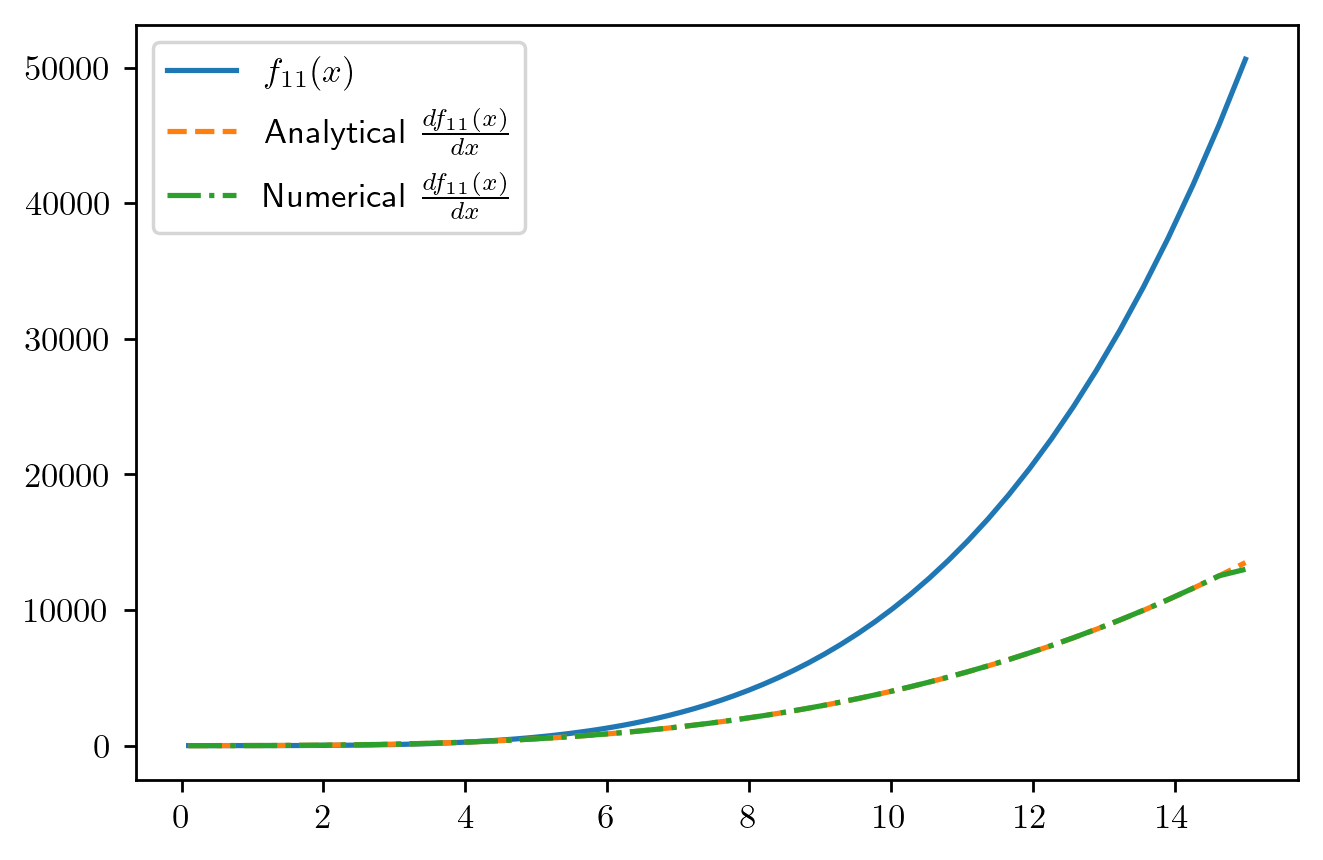

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
plt.style.use('style.mplstyle')

def a(x):
    a = array([[x, x**2],
            [x**3, x**4]])
    return a

def dadx(x):
    da = array([[1, 2*x],
            [3*x**2, 4*x**3]])
    return da

def dadx_grad(x_list):
    a00 = []
    a01 = []
    a10 = []
    a11 = []
    
    def a_func(x):
        a = array([[x, x**2],
                   [x**3, x**4]])
        return a

    for x in x_list:
        a00.append(a_func(x)[0,0])
        a01.append(a_func(x)[0,1])
        a10.append(a_func(x)[1,0])
        a11.append(a_func(x)[1,1])

    da00 = np.gradient(a00,x_list)
    da01 = np.gradient(a01,x_list)
    da10 = np.gradient(a10,x_list)
    da11 = np.gradient(a11,x_list)

    da = array([[da00,da01],
                [da10,da11]])
    return da

xi,xf,xn = 0.1,15,200
x = np.geomspace(xi,xf,xn)

a_list = []
da_list = []

k,l = 1,1
for xv in x:
    a_list.append(a(xv)[k,l])
    da_list.append(dadx(xv)[k,l])

da_list_grad = dadx_grad(x)[k,l]

plt.figure(dpi=250)
plt.plot(x,a_list,'-',label=r'$f_{11}(x)$')
plt.plot(x,da_list,'--',label=r'Analytical $\frac{df_{11}(x)}{dx}$')
plt.plot(x,da_list_grad,'-.',label=r'Numerical $\frac{df_{11}(x)}{dx}$')
plt.legend()
plt.show()